In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np


In [2]:
file_path = "/Users/priyankamalavade/Desktop/customer_churn_prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"


In [3]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)


In [4]:
# --- Initial Data Inspection ---

print("--- Dataframe Information ---")
df.info()

print("\n--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Summary statistics for numerical columns ---")
print(df.describe())

print("\n--- Distribution of the 'Churn' variable ---")
print(df['Churn'].value_counts())

--- Dataframe Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBil

In [5]:
# Convert 'TotalCharges' column to a numeric data type
# The 'errors' parameter is set to 'coerce' to turn any non-numeric values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [6]:
# Check how many rows now have missing values in 'TotalCharges'
print("Number of missing values in 'TotalCharges':")
print(df['TotalCharges'].isnull().sum())


Number of missing values in 'TotalCharges':
11


In [7]:
# Since the number of missing values is very small (likely around 11),
# we can safely drop these rows without losing much data.
df.dropna(subset=['TotalCharges'], inplace=True)


In [8]:
# Now, re-check the info to confirm the change
print("\n--- Dataframe Information after cleaning 'TotalCharges' ---")
df.info()


--- Dataframe Information after cleaning 'TotalCharges' ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null  

## EDA

In [9]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [10]:
# Convert Churn column to numerical for easier plotting
df['Churn_numerical'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


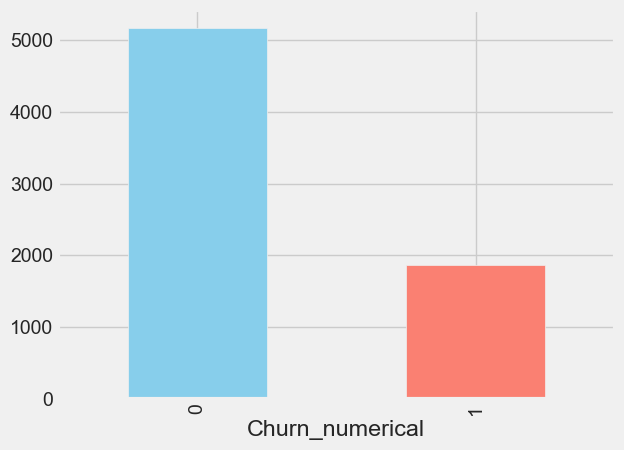

In [11]:
df['Churn_numerical'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.show()

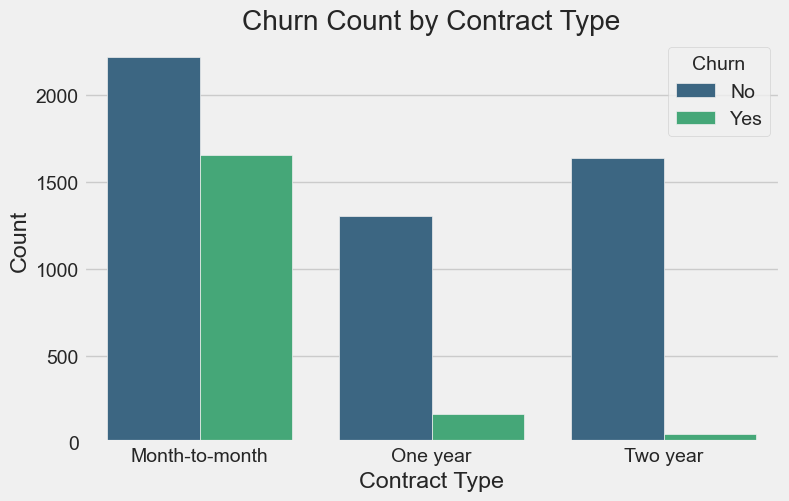

In [12]:
# --- 1. Plotting Churn vs. Contract Type ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


### Plot 1 ::Customers on a 'Month-to-month' contract have a much higher churn rate compared to those on 'One year' or 'Two year' contracts.It suggests that longer-term contracts are an effective way to retain customers

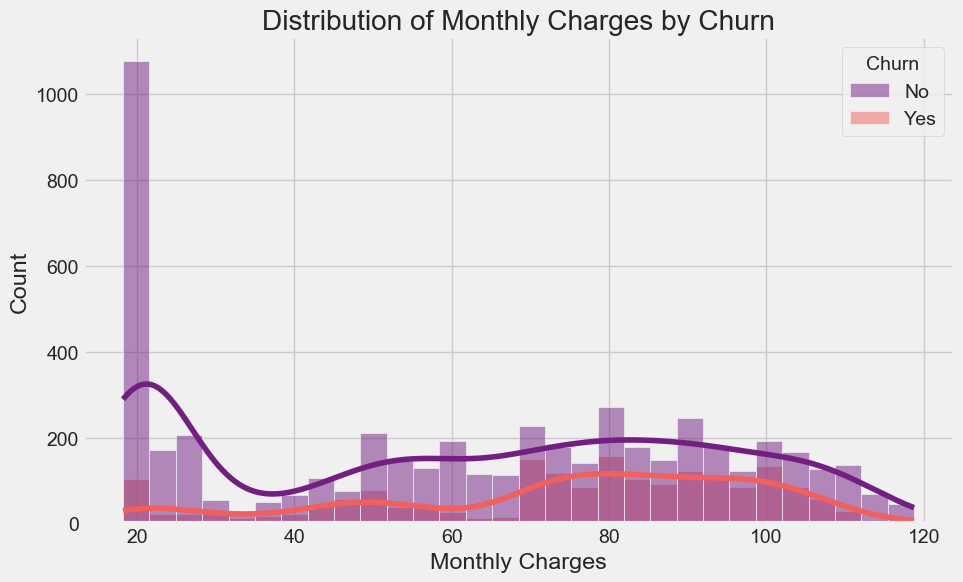

In [13]:
# --- 2. Plotting Churn vs. Monthly Charges ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30, palette='magma')
plt.title('Distribution of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

### plot 2 :: There's a large spike in churn for customers with very low tenure (less than 10 months). Conversely, customers with high tenure (over 60 months) are far more likely to stay .This indicates that customer retention efforts should be focused on the first few months of a customer's subscription.

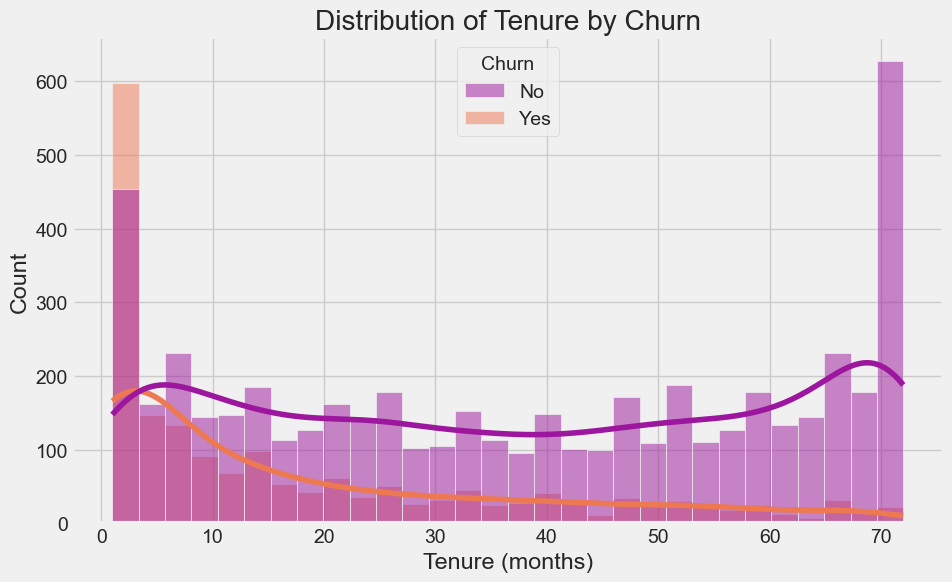

In [14]:
# --- 3. Plotting Churn vs. Tenure ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30, palette='plasma')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()


### plot 3 :: Customers with higher monthly charges are more likely to churn than those with lower charges. The churn distribution (the light-colored line) is much higher for monthly charges above $70, especially for Fiber Optic service users.

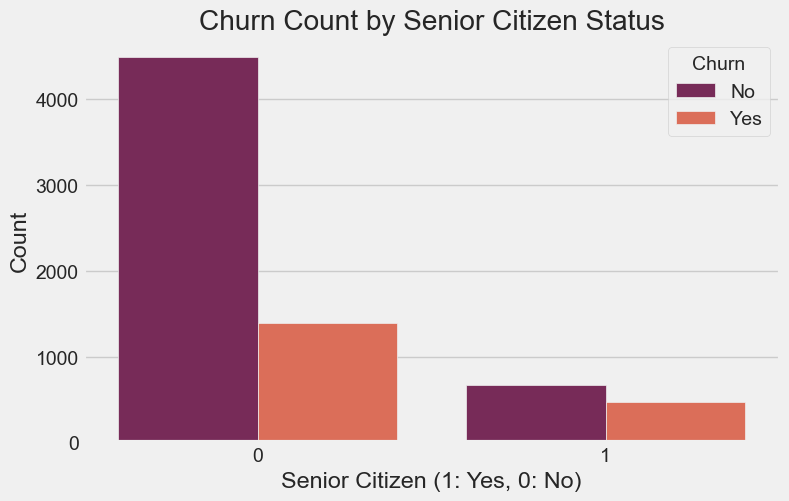

In [15]:
# --- 4. Plotting Churn vs. Senior Citizen ---
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='rocket')
plt.title('Churn Count by Senior Citizen Status')
plt.xlabel('Senior Citizen (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

### plot 4 :: non-seniors make up the majority of the customer base, Senior Citizens have a disproportionately higher churn rate . 

# DATA PREPROCESSING

In [16]:
# Convert the target variable 'Churn' to numerical (0 or 1)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [17]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [18]:
# Drop the 'customerID' column as it's just an identifier and not useful for modeling.
# Also, drop the temporary 'Churn_numerical' column we created for plotting.
df.drop(['customerID', 'Churn_numerical'], axis=1, inplace=True)


In [19]:
# Select all categorical columns except 'gender' and 'Churn' which are binary
categorical_columns = df.select_dtypes(include='object').columns.tolist()


In [20]:
# One-hot encode the selected categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [21]:
# Now, re-check the dataframe information to see the new columns
print("--- Dataframe Information after Preprocessing ---")
df.info()

--- Dataframe Information after Preprocessing ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes          

In [23]:
print("\n--- First 5 rows of the preprocessed dataset ---")
df.head()


--- First 5 rows of the preprocessed dataset ---


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


# Building the Predictive Model 

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [25]:
# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

In [26]:
# Split the data into training and testing sets
# We'll use a 75/25 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [27]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=2000) # Increased max_iter for convergence
model.fit(X_train, y_train)


/Users/priyankamalavade/Desktop/customer_churn_prediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [29]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [30]:
print(f"Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.7878

Confusion Matrix:
[[1150  150]
 [ 223  235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1300
           1       0.61      0.51      0.56       458

    accuracy                           0.79      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



* Recall for Churn: 0.51 (or 51%). This is the most critical metric. It means  model is only successfully identifying 51% of the customers who actually churn. This is a major area for improvement.

* Precision for Churn: 0.61 (or 61%). This means that when  model predicts a customer will churn, it's only correct 61% of the time. The other 39% are "false alarms," which could lead to wasted marketing efforts.



# Data Scaling

* Features like tenure and TotalCharges have very different numerical ranges than the 0 or 1 values from our one-hot encoded columns. This can confuse the model's optimization process.

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [32]:
# Define features (X) and target (y) again, just in case
X = df.drop('Churn', axis=1)
y = df['Churn']

In [33]:
# Re-split the data to ensure we use fresh splits for scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [34]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [35]:
# Fit the scaler ONLY on the training data and then transform both train and test sets
# This is a crucial step to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Initialize and train the Logistic Regression model on the scaled data
# You will notice the ConvergenceWarning is gone now
model_scaled = LogisticRegression(max_iter=2000)
model_scaled.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [37]:
# Make predictions on the scaled test set
y_pred_scaled = model_scaled.predict(X_test_scaled)


In [38]:
# Evaluate the new model's performance
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
class_report_scaled = classification_report(y_test, y_pred_scaled)


In [39]:
print(f"Model Accuracy (Scaled): {accuracy_scaled:.4f}")
print("\nConfusion Matrix (Scaled):")
print(conf_matrix_scaled)
print("\nClassification Report (Scaled):")
print(class_report_scaled)


Model Accuracy (Scaled): 0.7901

Confusion Matrix (Scaled):
[[1152  148]
 [ 221  237]]

Classification Report (Scaled):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.52      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



* Accuracy: The accuracy increased slightly to 79.01%. This is a small gain, which we expected. The more important metrics are in the classification report.

* Recall for Churn (Class 1): The recall is still around 0.52. This means that even with a better-trained model, we are only catching about half of the customers who are actually going to churn.

* Precision for Churn (Class 1): The precision is 0.62. When the model predicts churn, it's correct a little over 60% of the time.

# Trying a More Advanced Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [41]:
# Re-define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']


In [42]:
# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [43]:
# Initialize the Random Forest model
# We will use 100 trees and set a random state for reproducibility
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [44]:
# Train the model
model_rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)


In [46]:
# Evaluate the new model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)


In [47]:
print(f"Random Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(class_report_rf)

Random Forest Model Accuracy: 0.7929

Random Forest Confusion Matrix:
[[1175  125]
 [ 239  219]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1300
           1       0.64      0.48      0.55       458

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



* Overall Accuracy: The accuracy is 79.29%, which is a small but welcome improvement over the Logistic Regression model's 79.01%. This indicates that the more complex Random Forest model is doing a slightly better job of classifying all instances correctly.

### Precision and Recall for Churn (Class 1):

* Precision: The precision for churn is 0.64. This means that when the model predicts a customer will churn, it's correct 64% of the time. This is an improvement over the 0.62 from the Logistic Regression model. It's still not perfect, but it's a step in the right direction, reducing the number of "false alarms."

* Recall: The recall is 0.48. This is a slight decrease from the previous model's 0.52. This is an interesting result and highlights a common trade-off in machine learning: improving one metric (precision) can sometimes come at the cost of another (recall), especially in imbalanced datasets. Your Random Forest model is more conservative in predicting churn, which makes its positive predictions more reliable (higher precision), but it misses a few more of the actual churners (lower recall).

# Feature Importance

* One of the great advantages of a Random Forest model is that it can tell you which features were most important in making its predictions. This is invaluable for real-world business applications because it provides actionable insights. For example, if "tenure" is the most important feature, a company might focus on customer retention programs for new customers.



In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
#  df, X_train, and model_rf are all still defined from the previous step

# Get feature importances from the trained Random Forest model
feature_importances = model_rf.feature_importances_


In [50]:
# Create a DataFrame to easily visualize the importances
features_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})


In [51]:
# Sort the features by importance in descending order
features_df = features_df.sort_values(by='importance', ascending=False)


In [52]:
# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(features_df.head(10))

Top 10 Most Important Features:
                           feature  importance
3                     TotalCharges    0.194936
2                   MonthlyCharges    0.170350
1                           tenure    0.168265
10     InternetService_Fiber optic    0.042060
28  PaymentMethod_Electronic check    0.034556
13              OnlineSecurity_Yes    0.029958
25               Contract_Two year    0.028569
4                      gender_Male    0.027883
24               Contract_One year    0.025049
26            PaperlessBilling_Yes    0.024353


* TotalCharges: This is the most important feature. It makes sense, as TotalCharges is highly correlated with tenure and MonthlyCharges. Customers with low total charges (often because they are new) are more likely to churn.

* MonthlyCharges: As your EDA showed, higher monthly bills are a strong indicator of churn. This is the second most important feature.

* tenure: This is the third most important feature. Customers who have been with the company for a short time are far more likely to churn, which your initial plots also showed.

* InternetService_Fiber optic: This is the most significant categorical feature. It's a huge driver of churn, likely due to a combination of higher cost and potentially less reliable service than DSL.

* PaymentMethod_Electronic check: Customers using electronic checks are more likely to churn. This could be due to a less "sticky" payment method (no credit card on file) or because it's popular with month-to-month customers, who are already a high-churn group.

* OnlineSecurity_Yes and Contract_Two year: These features have a negative correlation with churn. This means that customers who have Online Security and are on a Two-year contract are much less likely to churn, which is exactly what your EDA showed. The model confirms that these are crucial for customer retention.

